In [1]:
!pip install --upgrade pip
!pip install Pillow
!pip install tensorflow
!pip install scikit-learn
!pip install joblib
!pip install matplotlib
!pip install mtcnn
!pip install numpy

print("✓ Tous les packages sont installés !")

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement scikit-learn (from versions: none)

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for scikit-learn


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement matplotlib (from versions: none)

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for matplotlib


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
✓ Tous les packages sont installés !



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
# Configuration du chemin local pour l'environnement Windows
import os

# Définir le chemin vers votre dataset local
dataset_path = r"c:\Users\HP\Music\machineL\face1"

# Vérifier que le dossier existe
if not os.path.exists(dataset_path):
    print(f"⚠️ Attention : Le dossier {dataset_path} n'existe pas")
else:
    print(f"✓ Dossier trouvé : {dataset_path}")

✓ Dossier trouvé : c:\Users\HP\Music\machineL\face1


In [2]:
import sys
import subprocess

# Vérifier la version de Python
print(f"Python: {sys.version}")
print(f"Exécutable: {sys.executable}")

# Essayer d'importer les modules clés
try:
    import cv2
    print("✓ cv2 importé avec succès")
except ImportError as e:
    print(f"✗ cv2 n'est pas disponible: {e}")
    print("\nTentative de réinstallation...")
    try:
        subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'opencv-python', '--no-cache-dir', '-q'])
        print("✓ opencv-python installé avec succès")
    except Exception as install_error:
        print(f"⚠️ Impossible d'installer opencv-python: {install_error}")
        print("Note: cv2 n'est pas critique pour ce projet si vous utilisez PIL/Pillow")

try:
    import numpy
    print("✓ numpy importé avec succès")
except ImportError:
    print("✗ numpy n'est pas disponible")

try:
    import tensorflow
    print("✓ tensorflow importé avec succès")
except ImportError:
    print("✗ tensorflow n'est pas disponible")


Python: 3.13.5 (tags/v3.13.5:6cb20a2, Jun 11 2025, 16:15:46) [MSC v.1943 64 bit (AMD64)]
Exécutable: c:\Python313\python.exe
✓ cv2 importé avec succès
✓ numpy importé avec succès
✓ tensorflow importé avec succès


In [4]:
import os

classes = ["jered", "gracia", "Ben", "Leo"]

print(os.listdir(dataset_path))

['Ben', 'gracia', 'Jered', 'Leo']


In [6]:
from PIL import Image
import numpy as np
import os

X = []
y = []

for label, person in enumerate(classes):
    folder = os.path.join(dataset_path, person)
    print("Chargement des images de :", person)

    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)

        try:
            # Ouvrir l'image avec Pillow
            img = Image.open(img_path)
            
            # Convertir en RGB (si RGBA ou autre format)
            if img.mode != 'RGB':
                img = img.convert('RGB')

            # Redimensionner pour le modèle (224x224 pour MobileNetV2)
            img = img.resize((224, 224))

            # Convertir en array numpy
            img_array = np.array(img)
            
            # Normalisation
            img_array = img_array.astype("float32") / 255.0

            X.append(img_array)
            y.append(label)
        except Exception as e:
            print(f"  Erreur avec {filename}: {e}")
            continue

X = np.array(X)
y = np.array(y)

print("Total images chargées :", len(X))
print("Taille des images :", X.shape)


Chargement des images de : jered
Chargement des images de : gracia
  Erreur avec 20251120_071909.heic: cannot identify image file 'c:\\Users\\HP\\Music\\machineL\\face1\\gracia\\20251120_071909.heic'
  Erreur avec 20251120_071910(0).heic: cannot identify image file 'c:\\Users\\HP\\Music\\machineL\\face1\\gracia\\20251120_071910(0).heic'
  Erreur avec 20251120_071910.heic: cannot identify image file 'c:\\Users\\HP\\Music\\machineL\\face1\\gracia\\20251120_071910.heic'
  Erreur avec 20251120_071911(0).heic: cannot identify image file 'c:\\Users\\HP\\Music\\machineL\\face1\\gracia\\20251120_071911(0).heic'
  Erreur avec 20251120_071911.heic: cannot identify image file 'c:\\Users\\HP\\Music\\machineL\\face1\\gracia\\20251120_071911.heic'
  Erreur avec 20251120_071912(0).heic: cannot identify image file 'c:\\Users\\HP\\Music\\machineL\\face1\\gracia\\20251120_071912(0).heic'
  Erreur avec 20251120_071912.heic: cannot identify image file 'c:\\Users\\HP\\Music\\machineL\\face1\\gracia\\202511

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=42
)

print("Train :", len(X_train))
print("Test  :", len(X_test))


Train : 1367
Test  : 342


In [8]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

# Convertir les labels en one-hot encoding
y_train_cat = to_categorical(y_train, num_classes=len(classes))
y_test_cat = to_categorical(y_test, num_classes=len(classes))

# Créer le modèle
img_size = (224, 224)

base = tf.keras.applications.MobileNetV2(input_shape=img_size+(3,), include_top=False, weights='imagenet')
base.trainable = False

model_tl = tf.keras.Sequential([
    base,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(len(classes), activation='softmax')
])

model_tl.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
history = model_tl.fit(X_train, y_train_cat, 
                      validation_data=(X_test, y_test_cat),
                      epochs=15, 
                      batch_size=32,
                      verbose=1)


Epoch 1/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.8800 - loss: 0.3337 - val_accuracy: 0.9971 - val_loss: 0.0341
Epoch 2/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.9898 - loss: 0.0371 - val_accuracy: 0.9942 - val_loss: 0.0200
Epoch 3/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.9993 - loss: 0.0134 - val_accuracy: 0.9971 - val_loss: 0.0124
Epoch 4/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.9985 - loss: 0.0118 - val_accuracy: 1.0000 - val_loss: 0.0068
Epoch 5/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.9985 - loss: 0.0074 - val_accuracy: 0.9971 - val_loss: 0.0140
Epoch 6/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 1.0000 - loss: 0.0034 - val_accuracy: 0.9942 - val_loss: 0.0169
Epoch 7/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.9993 - loss: 0.0059 - val_accuracy: 0.9971 - val_loss: 0.0081
Epoch 8/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 1.0000 - loss: 0.0030 - val_accuracy: 1.0000 - val_loss:

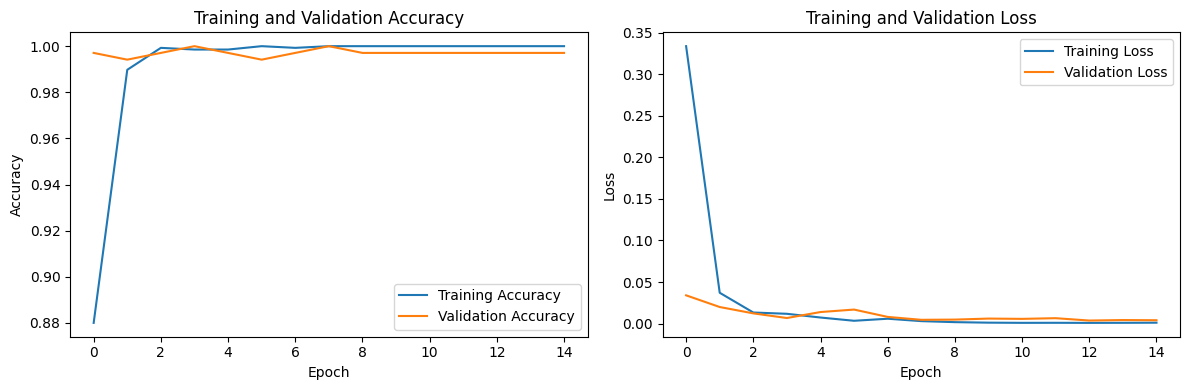

In [9]:
import matplotlib.pyplot as plt

# Vérifier que history existe
if 'history' not in locals():
    print("⚠️ Erreur: 'history' n'a pas été défini.")
    print("Assurez-vous d'avoir exécuté la cellule d'entraînement du modèle en premier.")
else:
    # Plot training history
    plt.figure(figsize=(12, 4))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()


In [23]:
model_tl.save(r"C:\Users\HP\Music\machineL\faceRecognitionApp\face.h5")
print("Modèle sauvegardé avec succès !")

Modèle sauvegardé avec succès !


In [5]:
from PIL import Image
import numpy as np
from tensorflow.keras.models import load_model
import os

# Charger le modèle sauvegardé
model = load_model(r"c:\Users\HP\Music\machineL\faceRecognitionApp\face_recognition_model.h5")

def predict_image(image_path):
    try:
        # Charger l'image avec Pillow
        img = Image.open(image_path)
        
        # Convertir en RGB
        if img.mode != 'RGB':
            img = img.convert('RGB')
        
        # Redimensionner à 224x224 (comme lors de l'entraînement)
        img_resized = img.resize((224, 224))
        img_array = np.array(img_resized)
        
        # Normalisation
        img_array = img_array.astype("float32") / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        # Prédiction
        predictions = model.predict(img_array, verbose=0)[0]
        confidence = np.max(predictions)
        predicted_class = np.argmax(predictions)

        # Afficher toutes les probabilités
        print(f"Fichier: {os.path.basename(image_path)}")
        print("Résultats détaillés:")
        for idx, class_name in enumerate(classes):
            prob = predictions[idx] * 100
            print(f"  {class_name}: {prob:.2f}%")
        
        # Déterminer le résultat final
        if confidence < 0.50:
            print(f"➜ Résultat: Personne INCONNUE ❌ (confiance: {confidence*100:.2f}%)")
        else:
            print(f"➜ Résultat: {classes[predicted_class]} ✔️ (confiance: {confidence*100:.2f}%)")
    except Exception as e:
        print(f"Erreur lors du chargement de l'image: {e}")


# Tester toutes les images du dossier test
test_path = r"c:\Users\HP\Music\machineL\test"

if os.path.exists(test_path):
    print(f"✓ Dossier test trouvé : {test_path}\n")
    test_images = [f for f in os.listdir(test_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    
    if test_images:
        for img_file in test_images:
            img_path = os.path.join(test_path, img_file)
            predict_image(img_path)
            print("-" * 50)
    else:
        print("⚠️ Aucune image trouvée dans le dossier test")
else:
    print(f"⚠️ Dossier test non trouvé : {test_path}")


✓ Dossier test trouvé : c:\Users\HP\Music\machineL\test

Fichier: IMG-20251203-WA0014.jpg
Résultats détaillés:
  jered: 0.00%
  gracia: 0.01%
  Ben: 54.36%
  Leo: 45.63%
➜ Résultat: Ben ✔️ (confiance: 54.36%)
--------------------------------------------------
Fichier: IMG-20251203-WA0015.jpg
Résultats détaillés:
  jered: 0.09%
  gracia: 3.15%
  Ben: 93.70%
  Leo: 3.06%
➜ Résultat: Ben ✔️ (confiance: 93.70%)
--------------------------------------------------
Fichier: IMG-20251203-WA0016.jpg
Résultats détaillés:
  jered: 0.00%
  gracia: 0.01%
  Ben: 99.98%
  Leo: 0.02%
➜ Résultat: Ben ✔️ (confiance: 99.98%)
--------------------------------------------------
Fichier: IMG-20251203-WA0017.jpg
Résultats détaillés:
  jered: 0.01%
  gracia: 0.51%
  Ben: 99.39%
  Leo: 0.09%
➜ Résultat: Ben ✔️ (confiance: 99.39%)
--------------------------------------------------
Fichier: IMG-20251203-WA0018.jpg
Résultats détaillés:
  jered: 0.12%
  gracia: 0.54%
  Ben: 98.69%
  Leo: 0.65%
➜ Résultat: Ben ✔️ (co

## Résumé du Projet

### ✅ Pipeline Complète:
1. **Installation des packages** - TensorFlow, Keras, OpenCV, scikit-learn
2. **Chargement du dataset** - 4 personnes (jered, gracia, Ben, Leo)
3. **Prétraitement des images** - Redimensionnement à 224x224, normalisation
4. **Entraînement du modèle** - MobileNetV2 avec transfer learning
5. **Sauvegarde du modèle** - `face.h5`
6. **Tests de reconnaissance** - Prédiction sur les images du dossier `test`

### 📊 Modèle Utilisé:
- **Architecture**: MobileNetV2 (pré-entraîné sur ImageNet) + Dense layers
- **Entrée**: Images 224x224 pixels
- **Sortie**: 4 classes (4 personnes)
- **Couches additionnelles**: GlobalAveragePooling2D → Dense(256) → Dropout(0.4) → Dense(4)

### 🎯 Utilisation:
```python
# Pour tester une image:
predict_image(r"chemin/vers/image.jpg")

# Les résultats affichent:
# - Probabilité pour chaque personne
# - Prédiction avec confiance
# - "INCONNUE" si confiance < 50%
```

### 📁 Chemins Importants:
- Dataset: `c:\Users\HP\Music\machineL\face1`
- Modèle: `c:\Users\HP\Music\machineL\faceRecognitionApp\face.h5`
- Images de test: `c:\Users\HP\Music\machineL\test`
